In [41]:
import numpy as np
from itertools import accumulate
from scipy.stats import norm
from scipy.stats import qmc
import scipy.stats as scs
import matplotlib.pyplot as plt

In [3]:
S0 = 100.0
T = 2.0
sigma = 0.2
r = 0.05
N = 100
dt = T / N
B = np.random.randn(N)*np.sqrt(dt)

115.37221758065836 166.80928309407116


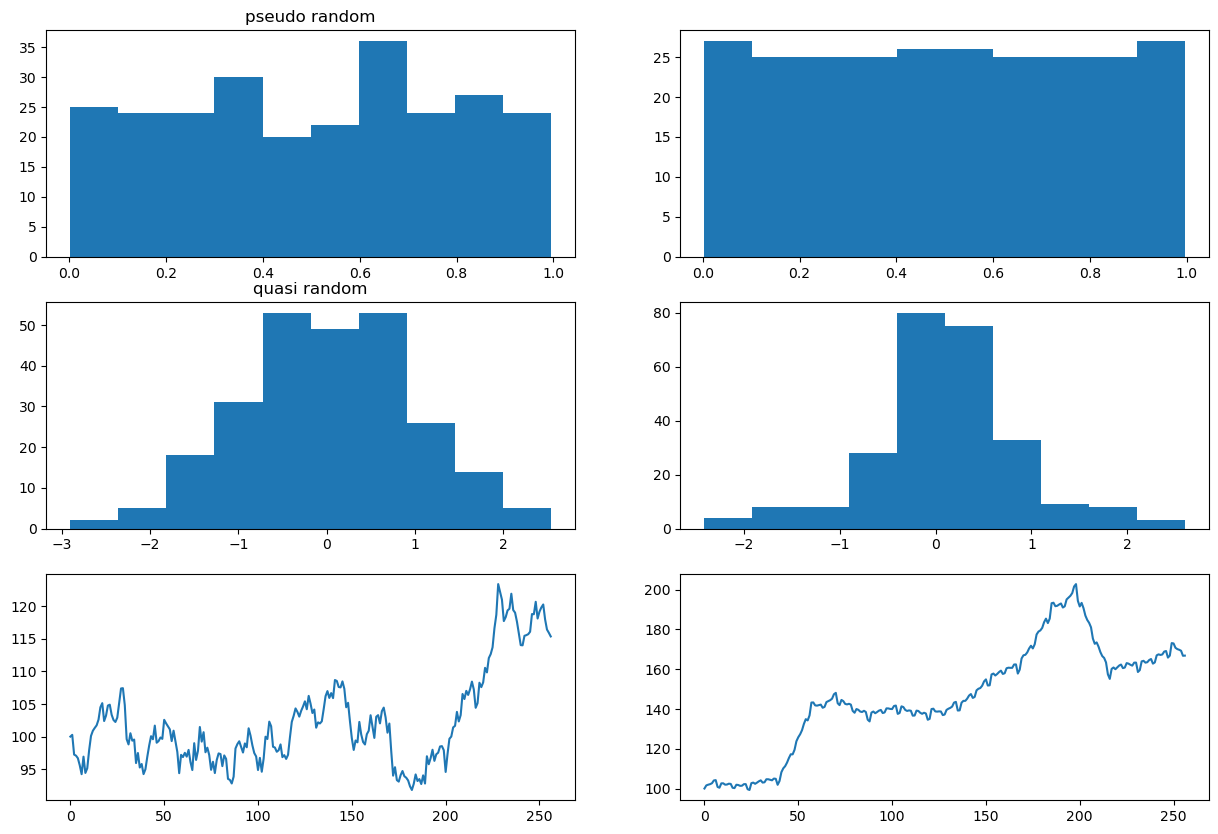

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(15,10))

S0 = 100.0
T = 2.0
sigma = 0.2
r = 0.05
k = 8
N = 2**k
dt = T / N


punif = np.random.rand(N)
pnorm = norm.ppf(punif)
passet = list(accumulate(pnorm, lambda S,db: S * np.exp((r-0.5*sigma**2)*dt + sigma*db*np.sqrt(dt)), initial=S0))
axs[0,0].set_title('pseudo random')
axs[0,0].hist(punif)
axs[1,0].hist(pnorm)
axs[2,0].plot(passet)

sampler = qmc.Sobol(d=1, scramble=True)
#sampler.reset()
qunif = sampler.random_base2(m=k)
qnorm = norm.ppf(qunif).cumsum()
qasset = list(accumulate(qnorm, lambda S,db: S * np.exp((r-0.5*sigma**2)*dt + sigma*db*np.sqrt(dt)), initial=S0))
axs[1,0].set_title('quasi random')
axs[0,1].hist(qunif)
axs[1,1].hist(qnorm)
axs[2,1].plot(qasset);

print(passet[-1], qasset[-1])

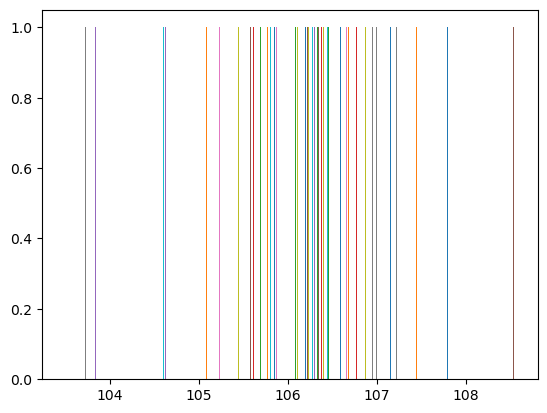

In [7]:
def get_qasset():
    S0 = 100.0
    T = 2.0
    sigma = 0.2
    r = 0.05
    k = 8
    N = 2**k
    dt = T / N
    sampler = qmc.Sobol(d=1, scramble=True)
    qunif = sampler.random_base2(m=k)
    qnorm = norm.ppf(qunif)
    qasset = list(accumulate(qnorm, lambda S,db: S * np.exp((r-0.5*sigma**2)*dt + sigma*db*np.sqrt(dt)), initial=S0))
    return qasset

ttt = [get_qasset()[-1] for i in range(100)]

plt.hist(ttt);

In [31]:
np.random.standard_normal()

2.6409515857802526

DescribeResult(nobs=256, minmax=(-2.9263330254007025, 2.9441031676041227), mean=5.5022880490571136e-05, variance=0.999814935553419, skewness=0.00141629189358357, kurtosis=-0.06867030850224776)

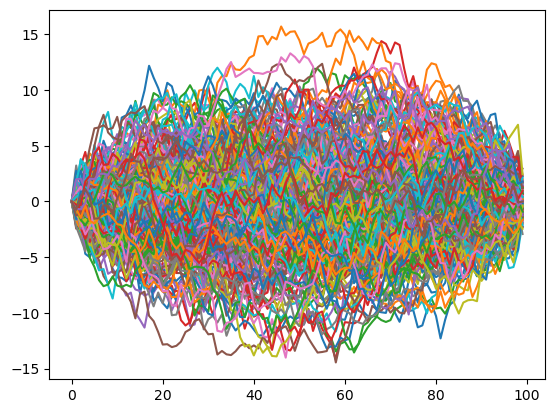

In [188]:
K = 8
M = 100

total_paths = 2**K

sampler = qmc.Sobol(d=1, scramble=True)
qunif = sampler.random_base2(m=k)

Ws = []

for i in range(1, 2**K+1):
    W = np.zeros(M)
    #v = (i-1+qunif[i-1])/total_paths
    v = qunif[i-1]
    W[-1] = norm.ppf(v)
    for j in range(1, M-1):
        Z = np.random.standard_normal()
        lw = ((M-j)/(M-(j-1)))
        rw = ((j-(j-1))/(M-(j-1)))
        stdev = ((M-j)*(j-(j-1)))/(M-(j-1))
        W[j] = lw*W[j-1] + rw*W[M-1] + np.sqrt(stdev)*Z
    Ws.append(W)

for w in Ws:
    plt.plot(w)

scs.describe(np.array(Ws)[:, -1])

In [172]:
len(Ws[0])

100

DescribeResult(nobs=256, minmax=(-2.8900821341851777, 2.8848816479317794), mean=0.0002769835723342995, variance=0.9996040772670535, skewness=0.005546041943286851, kurtosis=-0.07666710954917333)

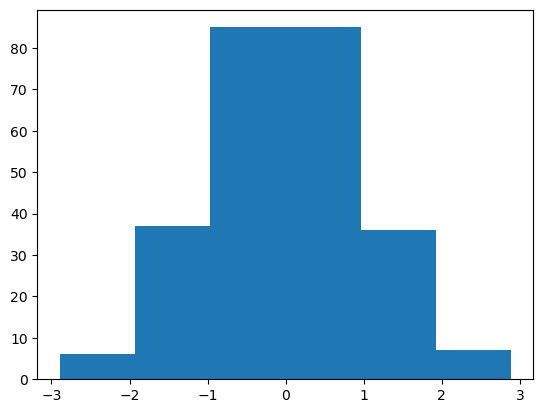

In [173]:
w_final = np.array(Ws)[:,-1]
plt.hist(w_final, bins=6);
scs.describe(w_final)

In [42]:
scs.describe(np.array(Ws)[:, -1])

DescribeResult(nobs=256, minmax=(-3.4911553020817734, 2.6799817931756187), mean=-0.002346050993968729, variance=1.0100264250485784, skewness=-0.06842210043773728, kurtosis=0.09702550467835991)

In [157]:
np.random.standard_normal((2,10))

array([[ 1.13771369,  0.5535262 ,  0.6403692 ,  1.08190471,  1.12947094,
         0.79553277,  0.48904487,  0.99819009,  1.41350401,  1.57163104],
       [-0.18234675, -1.3920266 ,  0.5238508 , -0.26172315, -0.43743647,
        -1.19610126, -0.1906851 ,  1.1016358 ,  2.11791218,  0.39954265]])

In [351]:
k = 10
total_paths = 2**k
sampler = qmc.Sobol(d=1, scramble=True)
qunif = np.array(sampler.random_base2(m=k))[:, 0]
qunif

array([0.32544507, 0.93423779, 0.51456644, ..., 0.51493507, 0.93460641,
       0.3250765 ])

In [352]:
%time
(qunif + range(0,2**k))/2**k

CPU times: total: 0 ns
Wall time: 0 ns


array([3.17817456e-04, 1.88890409e-03, 2.45563128e-03, ...,
       9.97573179e-01, 9.98959577e-01, 9.99340895e-01])

In [353]:
%time
v = []
for i in range(1, 2**k+1):
    v.append((i-1+qunif[i-1])/total_paths)
v

CPU times: total: 0 ns
Wall time: 0 ns


[0.0003178174556524027,
 0.0018889040948124602,
 0.0024556312846470973,
 0.003172886276843201,
 0.00394460585903289,
 0.005578822439019859,
 0.006694391066048411,
 0.007227399493785924,
 0.00828480677682819,
 0.009550892963488877,
 0.010418489970106748,
 0.010831347541170544,
 0.01185061982323532,
 0.013301548155141063,
 0.014596869949855318,
 0.014946001999305736,
 0.01588257043840713,
 0.017578112507180776,
 0.018140550476346107,
 0.018734303713245026,
 0.01963369691020489,
 0.02114345806057827,
 0.02225568744506745,
 0.02291219762810215,
 0.02384607333897293,
 0.0252356612809308,
 0.026107551233508275,
 0.02639595337495848,
 0.027535509227163857,
 0.028862935803772416,
 0.03016159311573574,
 0.03063518059479975,
 0.03159097950992873,
 0.03310049816718674,
 0.03372776886953943,
 0.03438547498717526,
 0.035157157432877284,
 0.036851026962722244,
 0.037906022507741,
 0.03850049437642156,
 0.039497332273640495,
 0.040823093761900964,
 0.041630147488831426,
 0.042104446149096475,
 0.0431

DescribeResult(nobs=64, minmax=(-2.3315162097382043, 2.536995569596082), mean=0.0012937332543677266, variance=1.0010634565539032, skewness=0.026979511150406966, kurtosis=-0.19241843329349217)

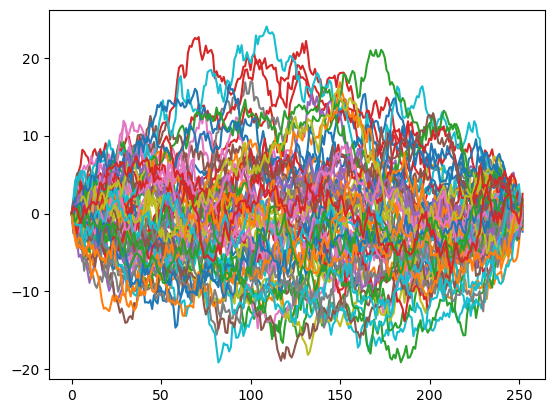

In [406]:
def brownian_bridge(m, n):
    total_paths = 2**m
    sampler = qmc.Sobol(d=1, scramble=True)
    W = np.zeros((total_paths,n+1))
    qunif = np.array(sampler.random_base2(m=m))[:, 0]
    qunif = (qunif + range(0,total_paths))/total_paths
    W[:,-1] = norm.ppf(qunif)
    Z = np.random.standard_normal((2**m, n-1))
    for j in range(1, n):
        lw = ((n-j)/(n-(j-1)))
        rw = ((j-(j-1))/(n-(j-1)))
        stdev = ((n-j)*(j-(j-1)))/(n-(j-1))
        W[:, j] = lw*W[:, j-1] + rw*W[:, n-1] + np.sqrt(stdev)*Z[:, j-1]
    return W

Ws = brownian_bridge(6,252)

for w in Ws:
    plt.plot(w)

scs.describe(np.array(Ws)[:, -1])

In [392]:
def brownian_bridge(m, n):
    total_paths = 2**m
    sampler = qmc.Sobol(d=1, scramble=True)
    W = np.zeros((total_paths,n+1))
    qunif = np.array(sampler.random_base2(m=m))[:, 0]
    qunif = (qunif + range(0,total_paths))/total_paths
    W[:,-1] = norm.ppf(qunif)
    Z = np.random.standard_normal((2**m, n-1))
    for j in range(1, n):
        lw = ((n-j)/(n-(j-1)))
        rw = ((j-(j-1))/(n-(j-1)))
        stdev = ((n-j)*(j-(j-1)))/(n-(j-1))
        W[:, j] = lw*W[:, j-1] + rw*W[:, n-1] + np.sqrt(stdev)*Z[:, j-1]
    return W

Ws = brownian_bridge(6,252)

for w in Ws:
    plt.plot(w)

scs.describe(np.array(Ws)[:, -1])

DescribeResult(nobs=64, minmax=(-1.7751128110345984, 1.8464086209080894), mean=0.027717898909856466, variance=0.6070117621789446, skewness=0.251392067047186, kurtosis=-0.20524445458581297)

In [257]:
Ws

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.49644145],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.73941036],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.22040494],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.93769309],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.2378367 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.602016  ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.0453036 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.30912604],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01662992],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.73096838],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.39527001],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.19701926],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.8553064 ],
       [ 0.        ,  0.        ,  0. 

In [ ]:
def brownian_bridge(M, N):

    sampler = qmc.Sobol(d=1, scramble=True)
    qunif = sampler.random_base2(m=k)
    
    W = np.zeros(N+1)
    dt = T / N
    W[N] = B[N-1] * np.sqrt(T)

    def brownian_bridge_recur(i, k):
        if k - i < 2:
            return
        
        j = int((k + i)/2)
        
        _t = (j-i)*dt
        _T = (k-i)*dt
        gamma = _t/_T
        stdev = gamma*(1-gamma)*_T
        W[j] = (1-gamma)*W[i] + gamma*W[k] + np.sqrt(stdev) * B[j-1]
        
        brownian_bridge_recur(i, j)
        brownian_bridge_recur(j, k)

    brownian_bridge_recur(0,N)
    return W

N = 2**12
T = 1
dt = T / N
bbrr = brownian_bridge(np.random.standard_normal(N), N, T)

aaa = bbrr[2:] - bbrr[1:-1]
plt.hist(aaa, bins=30)